In [1]:
import camelot as cm

C:\Users\HP PAVILION 15\AppData\Local\Programs\Python\Python311\Lib\site-packages\pypdf\_crypt_providers\_cryptography.py:32: CryptographyDeprecationWarning: ARC4 has been moved to cryptography.hazmat.decrepit.ciphers.algorithms.ARC4 and will be removed from cryptography.hazmat.primitives.ciphers.algorithms in 48.0.0.
  from cryptography.hazmat.primitives.ciphers.algorithms import AES, ARC4


In [3]:
ls

 Volume in drive C is Windows
 Volume Serial Number is B424-2B37

 Directory of C:\Users\HP PAVILION 15\Desktop\automation\table-extractor-from-pdf

24-07-2025  16:23    <DIR>          .
23-07-2025  19:38    <DIR>          ..
23-07-2025  19:44    <DIR>          .ipynb_checkpoints
23-07-2025  19:46             2,231 Extracting-Table-from-PDF.ipynb
24-07-2025  16:23           850,276 india_factsheet_economic_n_hdi.pdf
23-07-2025  19:44             1,124 MyfirstNotebook.ipynb
               3 File(s)        853,631 bytes
               3 Dir(s)  109,170,655,232 bytes free


In [4]:
input_pdf = cm.read_pdf("india_factsheet_economic_n_hdi.pdf", flavor='lattice', pages='1,2')

Overwriting cache for 0 71
Overwriting cache for 0 71
Overwriting cache for 0 71


In [5]:
input_pdf

<TableList n=4>

In [6]:
for n in input_pdf:
    print(n)

<Table shape=(4, 3)>
<Table shape=(15, 3)>
<Table shape=(14, 4)>
<Table shape=(13, 3)>


In [7]:
input_pdf[2].df

,0,1,2,3
0,Human Development Indicators,,2000,2011
1,13,Human Development Index Value (HDI),0.461,0.547
2,14,HDI Rank (out of 187),,134
3,15,Inequality Adjusted Human Development Index Value,,0.392
4,16,Loss in HDI due to Inequalities (%),,28.7
5,,,2001,2011
6,17,Gender Inequality Index (GII),0.5531,0.617
7,18,GII Rank (out of 146),,129
8,,,1996,2006
9,19,Gender Empowerment Measure (GEM),0.416,0.497


In [8]:
df = input_pdf[2].df.loc[11:14, 1:3]

In [9]:
df

,1,2,3
11,Literacy Rate (%),64.8,74.04
12,Male Literacy Rate (%),75.3,82.14
13,Female Literacy Rate (%),53.7,65.46


In [10]:
df = df.reset_index(drop = True)

In [11]:
df.columns = ["KPI", "2001", "2011"]

In [12]:
df

,KPI,2001,2011
0,Literacy Rate (%),64.8,74.04
1,Male Literacy Rate (%),75.3,82.14
2,Female Literacy Rate (%),53.7,65.46


In [13]:
df.loc[:,["2001", "2011"]] = df.loc[:,["2001", "2011"]].astype(float)

In [14]:
df

,KPI,2001,2011
0,Literacy Rate (%),64.8,74.04
1,Male Literacy Rate (%),75.3,82.14
2,Female Literacy Rate (%),53.7,65.46


In [15]:
df.to_csv("packt_output.csv")

In [16]:
ls

 Volume in drive C is Windows
 Volume Serial Number is B424-2B37

 Directory of C:\Users\HP PAVILION 15\Desktop\automation\table-extractor-from-pdf

24-07-2025  16:33    <DIR>          .
23-07-2025  19:38    <DIR>          ..
23-07-2025  19:44    <DIR>          .ipynb_checkpoints
24-07-2025  16:33            16,340 Extracting-Table-from-PDF.ipynb
24-07-2025  16:23           850,276 india_factsheet_economic_n_hdi.pdf
23-07-2025  19:44             1,124 MyfirstNotebook.ipynb
24-07-2025  16:33               124 packt_output.csv
               4 File(s)        867,864 bytes
               3 Dir(s)  109,150,433,280 bytes free


In [17]:
df.to_excel("table_from_pdf.xlsx")

In [18]:
ls

 Volume in drive C is Windows
 Volume Serial Number is B424-2B37

 Directory of C:\Users\HP PAVILION 15\Desktop\automation\table-extractor-from-pdf

24-07-2025  16:33    <DIR>          .
23-07-2025  19:38    <DIR>          ..
23-07-2025  19:44    <DIR>          .ipynb_checkpoints
24-07-2025  16:33            16,340 Extracting-Table-from-PDF.ipynb
24-07-2025  16:23           850,276 india_factsheet_economic_n_hdi.pdf
23-07-2025  19:44             1,124 MyfirstNotebook.ipynb
24-07-2025  16:33               124 packt_output.csv
24-07-2025  16:33             5,071 table_from_pdf.xlsx
               5 File(s)        872,935 bytes
               3 Dir(s)  109,150,412,800 bytes free


In [20]:
import pandas as pd

In [22]:
df2 = pd.read_csv("packt_output.csv")
df2

,Unnamed: 0,KPI,2001,2011
0,0,Literacy Rate (%),64.8,74.04
1,1,Male Literacy Rate (%),75.3,82.14
2,2,Female Literacy Rate (%),53.7,65.46


In [23]:
import seaborn as sns

In [27]:
df_melted = df.melt('KPI', var_name='year', value_name='percentage')
df_melted

,KPI,year,percentage
0,Literacy Rate (%),2001,64.8
1,Male Literacy Rate (%),2001,75.3
2,Female Literacy Rate (%),2001,53.7
3,Literacy Rate (%),2011,74.04
4,Male Literacy Rate (%),2011,82.14
5,Female Literacy Rate (%),2011,65.46


<Axes: xlabel='KPI', ylabel='percentage'>

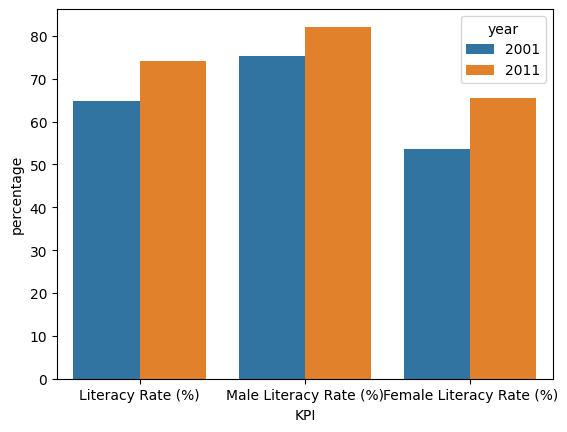

In [25]:
sns.barplot(x = "KPI", y = "percentage", hue = "year", data = df_melted)